In [1]:
!pip install yfinance

You should consider upgrading via the 'c:\users\91810\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install pandas_datareader

You should consider upgrading via the 'c:\users\91810\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
%matplotlib inline

In [4]:
!pip install cufflinks

You should consider upgrading via the 'c:\users\91810\anaconda3\python.exe -m pip install --upgrade pip' command.


In [21]:
# Create start and end variables
start= datetime.datetime(2020,1,1)
end = datetime.datetime(2021,5,25)

# Gather Stock Information

In [22]:
#STOCK INFORMATION ON SELECT FIRMS IN THE CONSUMER CYCLICAL INDUSTRY BASED ON MARKET CAP

# Airbnb, Inc.
ABNB = data.DataReader('ABNB','yahoo',start,end)
# Expedia Group, Inc.
EXPE = data.DataReader('EXPE','yahoo',start,end)
# Tourism Holdings Limited
THL = data.DataReader('THL.NZ','yahoo', start,end)

In [23]:
tickers = ['ABNB','EXPE','THL.NZ'] 

In [24]:
tourism_stocks = pd.concat([ABNB,EXPE,THL], axis = 1, keys = tickers)

In [25]:
tourism_stocks.columns.names = ['Tourism Ticker','Stock Info']

In [26]:
tourism_stocks.head()

Tourism Ticker ABNB                                        EXPE              \
Stock Info     High Low Open Close Volume Adj Close        High         Low   
Date                                                                          
2020-01-02      NaN NaN  NaN   NaN    NaN       NaN  111.150002  108.779999   
2020-01-03      NaN NaN  NaN   NaN    NaN       NaN  110.440002  108.349998   
2020-01-05      NaN NaN  NaN   NaN    NaN       NaN         NaN         NaN   
2020-01-06      NaN NaN  NaN   NaN    NaN       NaN  109.070000  107.800003   
2020-01-07      NaN NaN  NaN   NaN    NaN       NaN  110.300003  108.500000   

Tourism Ticker                                                THL.NZ        \
Stock Info            Open       Close     Volume   Adj Close   High   Low   
Date                                                                         
2020-01-02      108.870003  110.980003  3481200.0  110.569191   3.47  3.43   
2020-01-03      109.589996  109.129997  2027100.0  108.726028    NaN   NaN   
2020-01-05             NaN         NaN        NaN         NaN   3.42  3.30   
2020-01-06      108.160004  108.739998  2218300.0  108.337479   3.33  3.31   
2020-01-07      108.680000  110.019997  1813100.0  109.612740   3.40  3.33   

Tourism Ticker                                  
Stock Info      Open Close    Volume Adj Close  
Date                                            
2020-01-02      3.45  3.45   39139.0  3.180469  
2020-01-03       NaN   NaN       NaN       NaN  
2020-01-05      3.42  3.33  155195.0  3.069844  
2020-01-06      3.32  3.33   69115.0  3.069844  
2020-01-07      3.33  3.33   43074.0  3.069844

In [27]:
tourism_stocks.to_csv('tourism_Stock.csv')

# Exploratory Data Analysis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

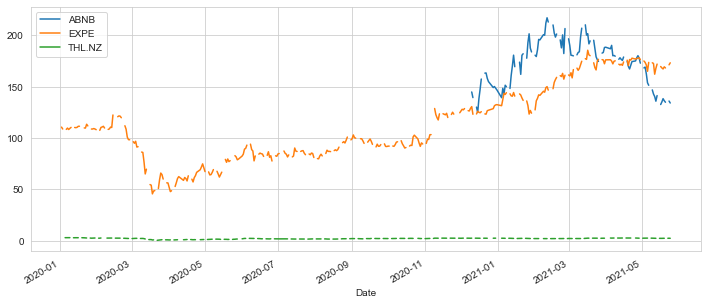

In [30]:
for tick in tickers:
    tourism_stocks[tick]['Adj Close'].plot(label = tick, figsize = (12,5))
plt.legend()

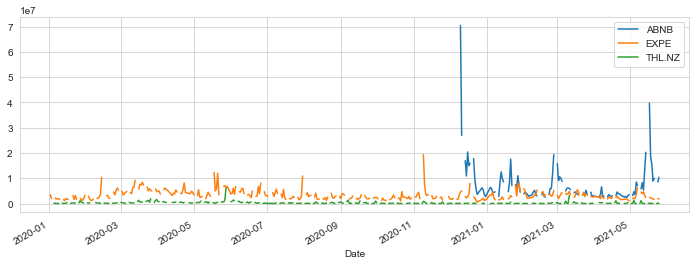

In [31]:
for tick in tickers:
    tourism_stocks[tick]['Volume'].plot(label = tick, figsize = (12,4))
plt.legend()

<AxesSubplot:xlabel='Tourism Ticker', ylabel='Tourism Ticker'>

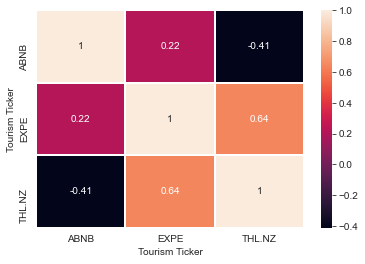

In [32]:

# Create heatmap
sns.heatmap(tourism_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(),annot = True,lw = 1)

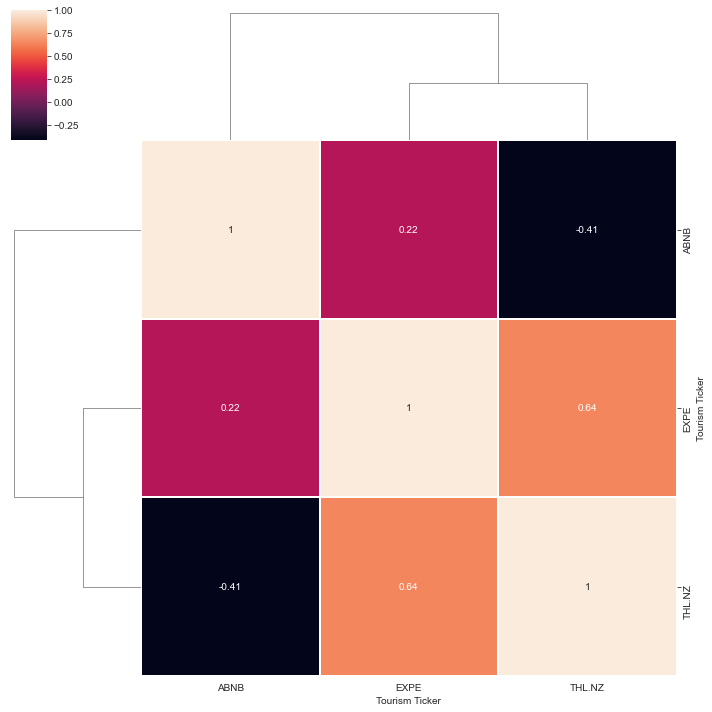

In [33]:

# Create cluter map
sns.clustermap(tourism_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True, lw = 1)